In [1]:

# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use␣,→"signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
#%matplotlib notebook
# to read .csv data file
from scipy.io import loadmat


In [2]:
# coding: utf-8

# In[ ]:

# Copyright (c) 2020 Hasan Huseyin Sonmez
#
# The following code implements a pole-zero diagram for discrete-time signal/systems
# It has been written to mimic the "zplane" function of Mathworks' MATLAB software.
# it is aimed as a supplementary tool to be used in
# ELM368 Fundamentals of Digital Signal Processing-laboratory course.
# Gebze Technical University, Kocaeli, Turkey
#
# The function parameters are:
#     Input:
#            b : the numerator coefficients of the discrete-time signal/system
#            a : the denominator coefficients of the discrete-time signal/system
#


# In[29]:

# import the necessary libraries



def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# In[ ]:


# SORU 1 

# A 

In [32]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0

(<StemContainer object of 3 artists>,
 Text(0, 0.5, 'Phase (rad)'),
 Text(0.5, 0, 'frequency(w/pi)'))

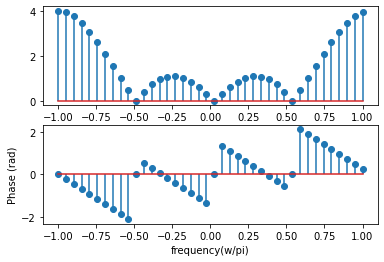

In [33]:
hn = [1, -1, 1, -1]
N = 40
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)

plt.ylabel('Amplitude')
ax1.stem(w/np.pi, Hw_mag)
ax2.stem(w/np.pi, Hw_phs), plt.ylabel('Phase (rad)'), plt.xlabel('frequency(w/pi)')

Text(0, 0.5, 'group delay (samples)')

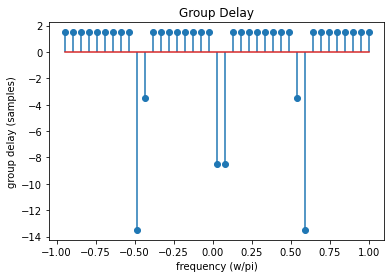

In [34]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.stem(w[1::]/np.pi, tau_w)
plt.title("Group Delay")
plt.xlabel('frequency (w/pi)')
plt.ylabel('group delay (samples)')

## Filtrenin bant geçiren filtre olduğu genlik grafiğinden çıkarımla elde edilmiştir. Belirli merkez frekansı etrafını geçirmektedir. Alt kesim frekansı -pi/2, üst kesim frekansının +pi/2 olduğu görülmektedir. 

# B

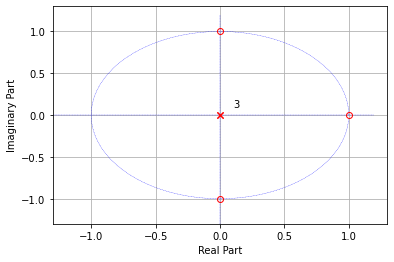

In [14]:
num = [1, -1, 1, -1]
denum = [1, 0, 0, 0]
zplane(num,denum)

## Bant geçiren filtre karakteristiği zero ve pole'lerden görülmektedir. (-pi, -pi/2) ve (pi/2,pi) bantlarında geçirme, aksi durumda sönümleme gerçekleşir. Bu yüzden xn sinyalinden dirac harici değerlerin geçmesi beklenir. 

## Bu sebepten xn = 2*np.cos(0.5*np.pi*n[i] + np.pi/4) + 3*np.sin((np.pi/3)*n[i] - np.pi/6) olduğu görülür.

# C

(<StemContainer object of 3 artists>, None)

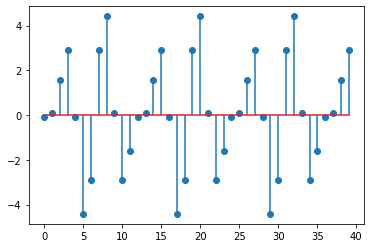

In [41]:
n = np.arange(0,40)
xn = np.zeros(len(n))
for i in range(len(n)):
    xn[i] = 2*np.cos(0.5*np.pi*n[i] + np.pi/4) + 3*np.sin((np.pi/3)*n[i] - np.pi/6)
plt.stem(n, xn), ax1.title.set_text('input signal')

# D

In [38]:
n = np.arange(0,40)
xn = np.zeros(len(n))
for i in range(len(n)):
    xn[i] = 5 + 4*dirac(n[i]) + 2*np.cos(0.5*np.pi*n[i] + np.pi/4) + 3*np.sin((np.pi/3)*n[i] - np.pi/6)


(<StemContainer object of 3 artists>,
 Text(0, 0.5, 'Phase (rad)'),
 Text(0.5, 0, 'frequency rad/,→sample'))

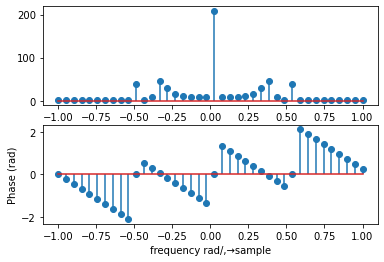

In [31]:

Xw = np.fft.fftshift(fft(xn, N))
w = np.linspace(-np.pi, np.pi, N)
Xw_mag = abs(Xw)
Xw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)

plt.ylabel('Amplitude')
ax1.stem(w/np.pi, Xw_mag)
ax2.stem(w/np.pi, Xw_phs), plt.ylabel('Phase (rad)'), plt.xlabel('frequency rad/,→sample')

(<StemContainer object of 3 artists>, None)

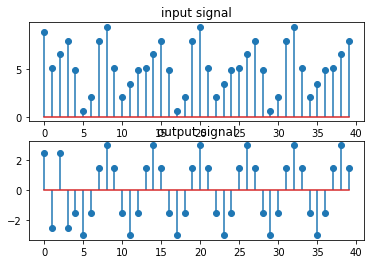

In [28]:
Yw_shifted = Hw * Xw # compute the fft of the output signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')